In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import os, sys
import numpy as np
import csv
import pandas as pd
sys.path.append("./pylinguistics/")
import Pylinguistics as pl
import json
import csv
import gc
from pandas import read_csv



part1=pd.read_csv('/home/vinicius/Desktop/pylinguistics/5primeiros.csv', sep='\t')
part2=pd.read_csv('/home/vinicius/Desktop/pylinguistics/6-10.csv', sep='\t')
part3=pd.read_csv('/home/vinicius/Desktop/pylinguistics/11-15.csv', sep='\t')
part4=pd.read_csv('/home/vinicius/Desktop/pylinguistics/16-20.csv', sep='\t')




cohmetrix=pd.concat([part1,part2,part3,part4])
cohmetrix = cohmetrix.reset_index(drop=True)

cohmetrix.head()

,DESPC,DESSC,DESWC,DESPL,DESPLd,DESSL,DESSLd,DESWLsy,DESWLsyd,DESWLlt,...,"WRDCNCc 'Concreteness for content words, mean'","WRDIMGc 'Imagability for content words, mean'","WRDMEAc 'Meaningfulness, Colorado norms, content words, mean'","WRDPOLc 'Polysemy for content words, mean'","WRDHYPn 'Hypernymy for nouns, mean'","WRDHYPv 'Hypernymy for verbs, mean'","WRDHYPnv 'Hypernymy for nouns and verbs, mean'",RDFRE 'Flesch Reading Ease',RDFKGL 'Flesch-Kincaid Grade level',RDL2 'Coh-Metrix L2 Readability'
0,12,17,411,1.417,0.515,24.176,11.207,1.608,0.889,4.895,...,360.348,394.576,401.036,3.866,6.195,1.655,2.136,46.260,12.813,10.801
1,23,31,696,1.348,0.573,22.452,10.742,1.615,0.916,4.894,...,393.891,438.696,454.341,3.776,5.441,1.935,1.940,47.417,12.223,10.237
2,19,21,529,1.105,0.315,25.190,11.527,1.544,0.785,4.868,...,426.241,451.915,440.710,3.021,5.021,1.504,1.737,50.645,12.453,8.701
3,28,37,842,1.321,0.670,22.757,10.930,1.422,0.728,4.511,...,391.409,430.164,429.174,4.127,4.229,1.562,1.558,63.435,10.065,12.598
4,35,58,1120,1.657,0.765,19.310,9.267,1.598,0.825,4.988,...,407.654,436.453,423.218,3.548,4.623,1.662,2.071,52.045,10.797,3.272


In [3]:

pyling=pd.read_csv('pylingResultsEn.csv')

#print cohmetrix.CNCCaus

pyling.head()

,Unnamed: 0,ConnectiveAdditiveIncidence,redability,word_count,ConnectiveLogicIncidence,syllable_count,avg_word_per_sentence,LogicIfIncidence,LogicAndIncidence,ContentDiversty,...,adjectiveIncidence,LogicNegationIncidence,contentIncidence,ConnectiveIncidence,avg_syllables_per_word,ConnectiveTemporalIncidence,sentence_count,ConnectiveCasualIncidence,advIncidence,LexicalDiversty
0,0,26.548673,11.9,452,24.336283,678,25.111111,0.000000,19.911504,0.734375,...,79.646018,2.212389,566.371681,26.548673,1.500000,11.061947,18,13.274336,39.823009,0.542035
1,0,22.972973,11.8,740,22.972973,1135,23.870968,0.000000,21.621622,0.695755,...,74.324324,8.108108,572.972973,28.378378,1.533784,12.162162,31,4.054054,20.270270,0.493243
2,0,19.572954,12.7,562,23.131673,826,28.100000,0.000000,19.572954,0.646302,...,101.423488,3.558719,553.380783,28.469751,1.469751,26.690391,20,5.338078,32.028470,0.475089
3,0,40.000000,9.7,900,42.222222,1203,24.324324,2.222222,40.000000,0.627255,...,81.111111,1.111111,554.444444,40.000000,1.336667,13.333333,37,10.000000,16.666667,0.442222
4,0,25.764895,11.2,1242,27.375201,1755,25.875000,0.805153,21.739130,0.548518,...,73.268921,1.610306,597.423510,33.816425,1.413043,24.959742,48,5.636071,20.128824,0.403382


In [4]:
#pyling=pd.read_csv('pylinguisticsResults.csv')
#cohmetrix=pd.read_csv('cohmetrixResults.csv', sep='\t')

def calcMse(a, b):
    r = a - b
    r = r*r
    return r

def calcPmedia(a, b):
    
    return ((100*a) / (float(b)))-100
    

dic={'ConnectiveAdditiveIncidence':'CNCAdd','word_count':"DESWC",'ConnectiveLogicIncidence':"CNCLogic",'avg_word_per_sentence':"DESSL",'pronIncidence':"WRDPRO",'verbIncidence':"WRDVERB",'nounIncidence':"WRDNOUN",'adjectiveIncidence':"WRDADJ",'LogicNegationIncidence':"DRNEG",'ConnectiveIncidence':"CNCAll",'avg_syllables_per_word':"DESWLsy",'ConnectiveTemporalIncidence':"CNCTemp",'sentence_count':"DESSC",'ConnectiveCasualIncidence':"CNCCaus",'advIncidence':"WRDADV",'LexicalDiversty':"LDTTRa"}

result = []
resultp=[]
for index, row in pyling.iterrows():
    mse = {}
    pmedia={}
    for key in dic:
        #pyling.loc[index]
        #cohmetrix.loc[index]
        mse[key] = calcMse(pyling.loc[index][key], cohmetrix.loc[index][dic[key]])
        pmedia[key] = calcPmedia(pyling.loc[index][key], cohmetrix.loc[index][dic[key]])
    
    result.append(mse)
    resultp.append(pmedia)

    
dfresult = pd.DataFrame(resultp)
dfresult.head(20)

,ConnectiveAdditiveIncidence,ConnectiveCasualIncidence,ConnectiveIncidence,ConnectiveLogicIncidence,ConnectiveTemporalIncidence,LexicalDiversty,LogicNegationIncidence,adjectiveIncidence,advIncidence,avg_syllables_per_word,avg_word_per_sentence,nounIncidence,pronIncidence,sentence_count,verbIncidence,word_count
0,-31.802326,36.398852,-50.402271,-9.070830,13.665710,-3.723730,-9.067432,-9.070546,-3.720785,-6.716418,3.867931,-7.108429,7.627421,5.882353,26.879015,9.975669
1,-30.481834,-85.892072,-60.497253,-15.846833,20.932307,-1.548255,12.863420,-9.246585,-5.947150,-5.028868,6.320006,-5.102323,3.646335,0.000000,25.082031,6.321839
2,-45.505043,-76.467650,-63.267207,1.973517,17.661750,-2.445797,-5.878898,5.202356,21.021990,-4.808880,11.552203,-9.080741,21.192951,-4.761905,7.110161,6.238185
3,-21.674597,-43.867527,-51.188559,77.755324,12.271247,0.733991,-68.815293,13.825778,-29.833425,-6.000938,6.887219,-1.378372,11.005216,0.000000,12.456813,6.888361
4,-44.506892,-74.749918,-60.954166,-28.697415,86.364088,-4.184883,-9.837292,-4.580365,7.353731,-11.574250,33.997929,-8.857310,6.424959,-17.241379,36.150431,10.892857
5,-14.781661,-66.715674,-61.168782,-8.470695,55.607803,-0.607893,-45.079599,-15.647645,-5.515344,-8.396042,9.251632,-7.547758,33.414578,0.000000,26.163890,9.252669
6,-48.483978,-52.273052,-71.151450,-25.758080,-9.847215,-3.468617,-9.855214,-6.379801,-9.845019,-7.949100,10.923854,-8.743524,21.237817,0.000000,23.610872,10.923277
7,-61.041565,-34.890211,-60.345879,-46.334756,-21.352660,1.215401,-33.914882,-5.440733,-10.859997,-6.234345,15.618534,-5.039152,1.707303,-6.521739,42.066106,8.077994
8,-50.891060,-61.230657,-67.226411,-24.365052,-0.836086,-2.987581,-17.130880,-11.868338,-5.434022,-7.598786,14.638448,-1.615452,2.817800,-5.263158,30.601079,8.603491
9,-33.949539,-81.044257,-60.553614,19.501445,-3.289796,-0.736754,-8.390933,-4.902898,-10.565119,-9.410399,11.947826,-6.183566,10.986568,-2.500000,23.954629,9.149131


In [5]:
saida = dfresult


yerrs =saida.std()

#print saida

saida.mean().plot(kind='bar' ,yerr=yerrs)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

dfresult = pd.DataFrame(result)
dfresult.head(20)

,ConnectiveAdditiveIncidence,ConnectiveCasualIncidence,ConnectiveIncidence,ConnectiveLogicIncidence,ConnectiveTemporalIncidence,LexicalDiversty,LogicNegationIncidence,adjectiveIncidence,advIncidence,avg_syllables_per_word,avg_word_per_sentence,nounIncidence,pronIncidence,sentence_count,verbIncidence,word_count
0,153.272507,12.548146,727.884109,5.893809,1.768759,0.000440,0.048669,63.122744,2.368494,0.011664,0.874433,577.955639,5.820413,1,790.811048,1681
1,101.465873,609.198456,1888.825632,18.714510,4.431708,0.000060,0.853976,57.345417,1.642831,0.006596,2.013469,267.255337,2.000874,0,1221.944610,1936
2,267.127848,300.881000,2404.455655,0.200411,16.051173,0.000142,0.049409,25.155115,30.952196,0.005513,8.468100,912.758708,13.000039,1,60.773288,1089
3,122.522761,61.074225,1759.634704,341.112169,2.123820,0.000010,6.011759,97.064093,50.216120,0.007282,2.456506,20.562194,19.748301,0,214.511825,3364
4,427.005222,278.386861,2786.844796,121.391888,133.789529,0.000310,0.030868,12.369844,1.901157,0.034209,43.099225,1363.957399,3.162580,100,1083.894876,14884
5,25.857623,303.135586,2293.477267,5.341388,43.509823,0.000008,28.594067,89.614859,4.113423,0.018318,4.443208,711.893085,150.983708,0,1186.856139,6084
6,175.297724,133.541217,2140.234906,32.425494,2.771132,0.000306,0.262829,41.874251,4.736456,0.017161,5.444963,775.980706,17.161538,0,886.984283,7056
7,463.855099,76.509588,2215.223883,462.719277,15.722724,0.000026,4.859676,21.133262,68.369485,0.009507,13.371948,202.315431,0.325679,9,2460.633524,7569
8,362.381098,210.428533,2445.874359,72.361744,0.018366,0.000187,4.562707,107.307287,6.284980,0.013641,9.544667,19.459423,2.282491,4,1398.212665,4761
9,178.385087,462.364482,1591.139343,16.840264,0.293508,0.000008,0.147368,12.557928,16.482450,0.023673,10.658551,450.092372,1.454955,1,888.399185,10000


In [7]:
#cohmetrix[dic['redability']].head(20)


In [8]:
#pyling.head(20)

In [9]:
dfresult.head()

,ConnectiveAdditiveIncidence,ConnectiveCasualIncidence,ConnectiveIncidence,ConnectiveLogicIncidence,ConnectiveTemporalIncidence,LexicalDiversty,LogicNegationIncidence,adjectiveIncidence,advIncidence,avg_syllables_per_word,avg_word_per_sentence,nounIncidence,pronIncidence,sentence_count,verbIncidence,word_count
0,153.272507,12.548146,727.884109,5.893809,1.768759,0.000440,0.048669,63.122744,2.368494,0.011664,0.874433,577.955639,5.820413,1,790.811048,1681
1,101.465873,609.198456,1888.825632,18.714510,4.431708,0.000060,0.853976,57.345417,1.642831,0.006596,2.013469,267.255337,2.000874,0,1221.944610,1936
2,267.127848,300.881000,2404.455655,0.200411,16.051173,0.000142,0.049409,25.155115,30.952196,0.005513,8.468100,912.758708,13.000039,1,60.773288,1089
3,122.522761,61.074225,1759.634704,341.112169,2.123820,0.000010,6.011759,97.064093,50.216120,0.007282,2.456506,20.562194,19.748301,0,214.511825,3364
4,427.005222,278.386861,2786.844796,121.391888,133.789529,0.000310,0.030868,12.369844,1.901157,0.034209,43.099225,1363.957399,3.162580,100,1083.894876,14884


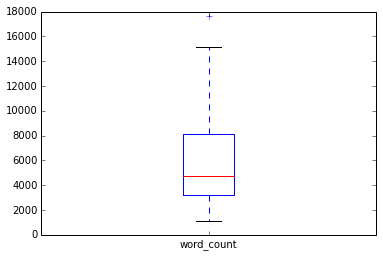

In [10]:
dfresult.word_count.plot(kind='box')

In [11]:
from scipy.stats import ttest_ind
from scipy.special import stdtr



for key in dic:
        #print pyling.loc[index]
        #print cohmetrix.loc[index]
    a = pyling[key]
    b = cohmetrix[dic[key]]

        # Create sample data.
        #a = opinionated_metrics[opinionated_metrics.columns[i]].as_matrix()
        #b = journalistic_metrics[journalistic_metrics.columns[i]].as_matrix()
    #print key
    #print a
    #print b
        # Use scipy.stats.ttest_ind.
    t, p = ttest_ind(a, b, equal_var=False)
    if (p <= 0.05):
        print "t = %.3f  p = %.3f  %s" % (t, p, key)
        #print a
        #print b
        #comparaMedias(col[i])

t = -6.832  p = 0.000  ConnectiveAdditiveIncidence
t = 5.472  p = 0.000  verbIncidence
t = -4.419  p = 0.000  avg_syllables_per_word
t = 2.277  p = 0.031  avg_word_per_sentence
t = -8.271  p = 0.000  ConnectiveCasualIncidence
t = -16.723  p = 0.000  ConnectiveIncidence
